In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


In [119]:
#loading data set
df = pd.read_csv("E:/Data Science/Hackathon/train_set.csv")

In [120]:
df.head()

,Image Index,Finding Labels,Follow-up,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000011_000.png,0,0,11,75,M,PA,2638,2449,0.143,0.143
1,00000013_011.png,1,11,13,60,M,AP,3056,2544,0.139,0.139
2,00000013_012.png,1,12,13,60,M,AP,3056,2544,0.139,0.139
3,00000013_013.png,1,13,13,60,M,AP,3056,2544,0.139,0.139
4,00000013_036.png,1,36,13,56,M,PA,2952,2968,0.143,0.143


In [121]:
#Checking mising values
df.isnull().sum()

Image Index                    0
Finding Labels                 0
Follow-up                      0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage_Width            0
OriginalImage_Height           0
OriginalImagePixelSpacing_x    0
OriginalImagePixelSpacing_y    0
dtype: int64

In [122]:
#Checking duplicate values
df.duplicated().sum()

0

In [123]:
#Dropping Image index and patient id 
df = df.drop(['Image Index','Patient ID'],axis=1)

In [124]:
df.head()

,Finding Labels,Follow-up,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,0,0,75,M,PA,2638,2449,0.143,0.143
1,1,11,60,M,AP,3056,2544,0.139,0.139
2,1,12,60,M,AP,3056,2544,0.139,0.139
3,1,13,60,M,AP,3056,2544,0.139,0.139
4,1,36,56,M,PA,2952,2968,0.143,0.143


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Finding Labels               4305 non-null   int64  
 1   Follow-up                    4305 non-null   int64  
 2   Patient Age                  4305 non-null   int64  
 3   Patient Gender               4305 non-null   object 
 4   View Position                4305 non-null   object 
 5   OriginalImage_Width          4305 non-null   int64  
 6   OriginalImage_Height         4305 non-null   int64  
 7   OriginalImagePixelSpacing_x  4305 non-null   float64
 8   OriginalImagePixelSpacing_y  4305 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 302.8+ KB


In [126]:
df['Finding Labels'] = df['Finding Labels'].astype('category')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Finding Labels               4305 non-null   category
 1   Follow-up                    4305 non-null   int64   
 2   Patient Age                  4305 non-null   int64   
 3   Patient Gender               4305 non-null   object  
 4   View Position                4305 non-null   object  
 5   OriginalImage_Width          4305 non-null   int64   
 6   OriginalImage_Height         4305 non-null   int64   
 7   OriginalImagePixelSpacing_x  4305 non-null   float64 
 8   OriginalImagePixelSpacing_y  4305 non-null   float64 
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 273.5+ KB


<Axes: >

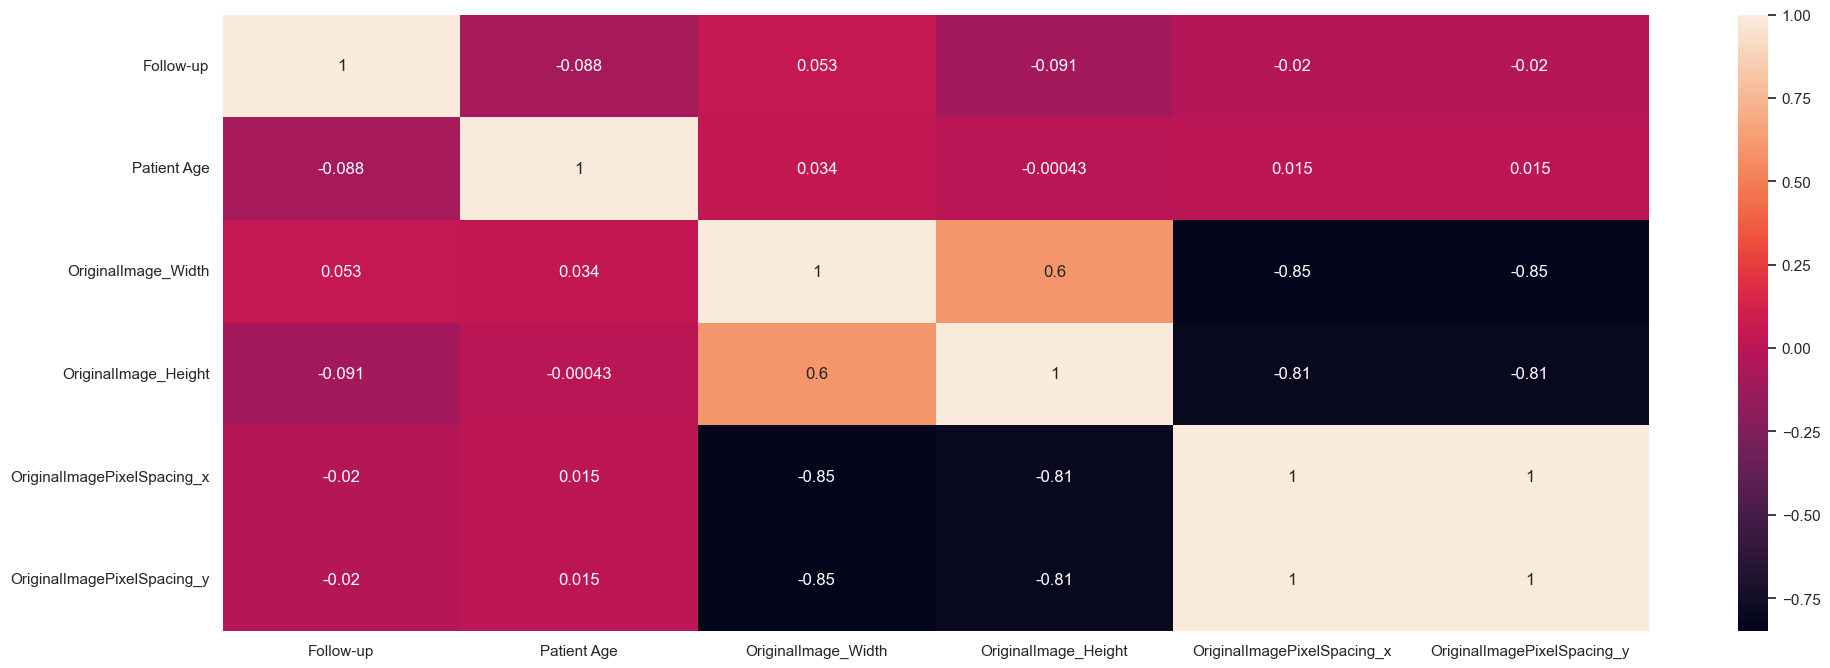

In [128]:
#Checking correlation
sns.heatmap(df.corr(),annot=True)

In [129]:
df = df.drop(['OriginalImagePixelSpacing_x','OriginalImagePixelSpacing_y'],axis=1)

In [130]:
df.head()

,Finding Labels,Follow-up,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height
0,0,0,75,M,PA,2638,2449
1,1,11,60,M,AP,3056,2544
2,1,12,60,M,AP,3056,2544
3,1,13,60,M,AP,3056,2544
4,1,36,56,M,PA,2952,2968


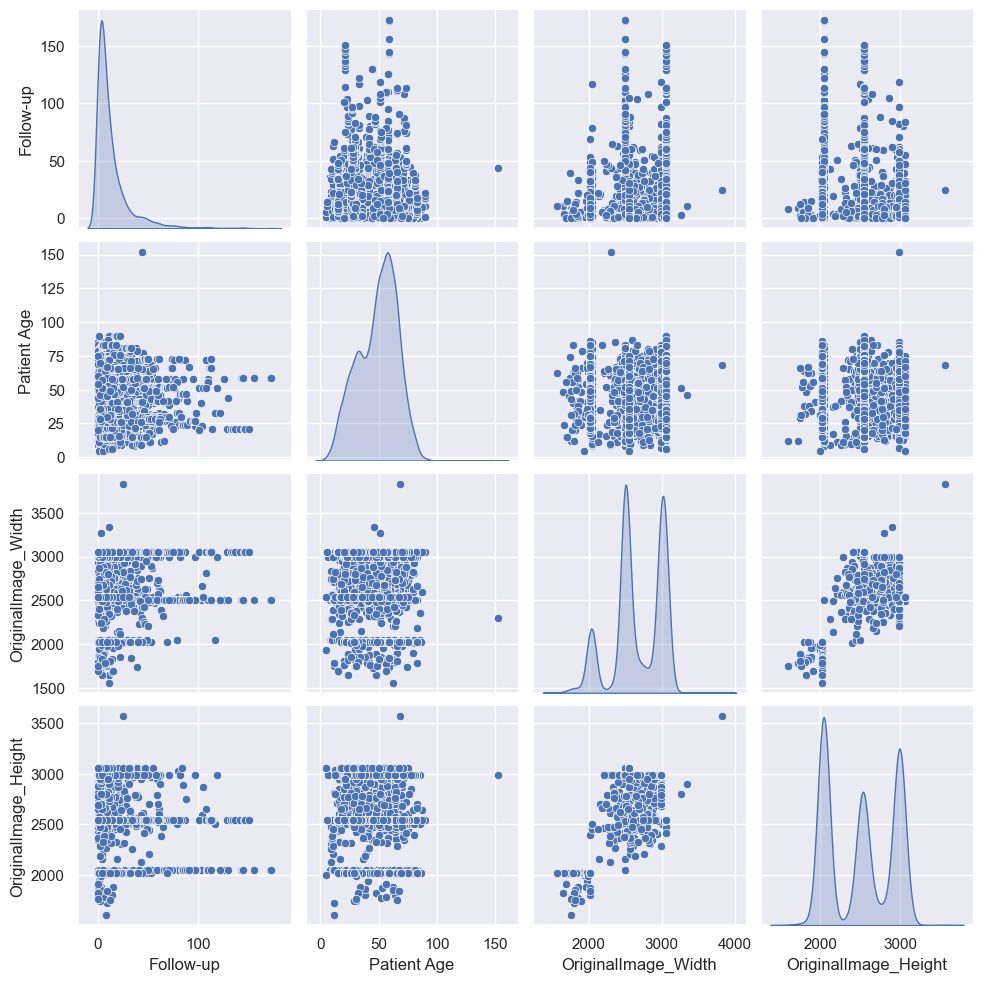

In [131]:
sns.pairplot(df,diag_kind='kde')

<Axes: ylabel='Finding Labels'>

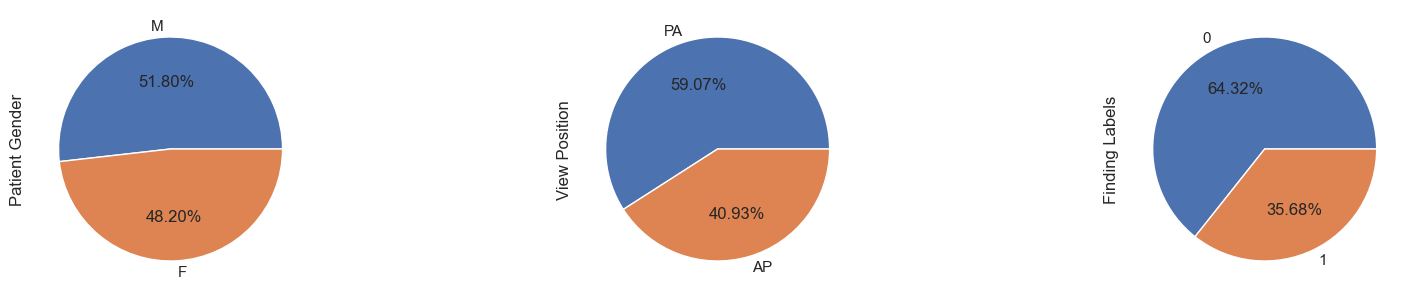

In [132]:
#Checking distribution of age
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
df['Patient Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.subplot(2,3,2)
df['View Position'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.subplot(2,3,3)
df['Finding Labels'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Figure size 2000x800 with 0 Axes>

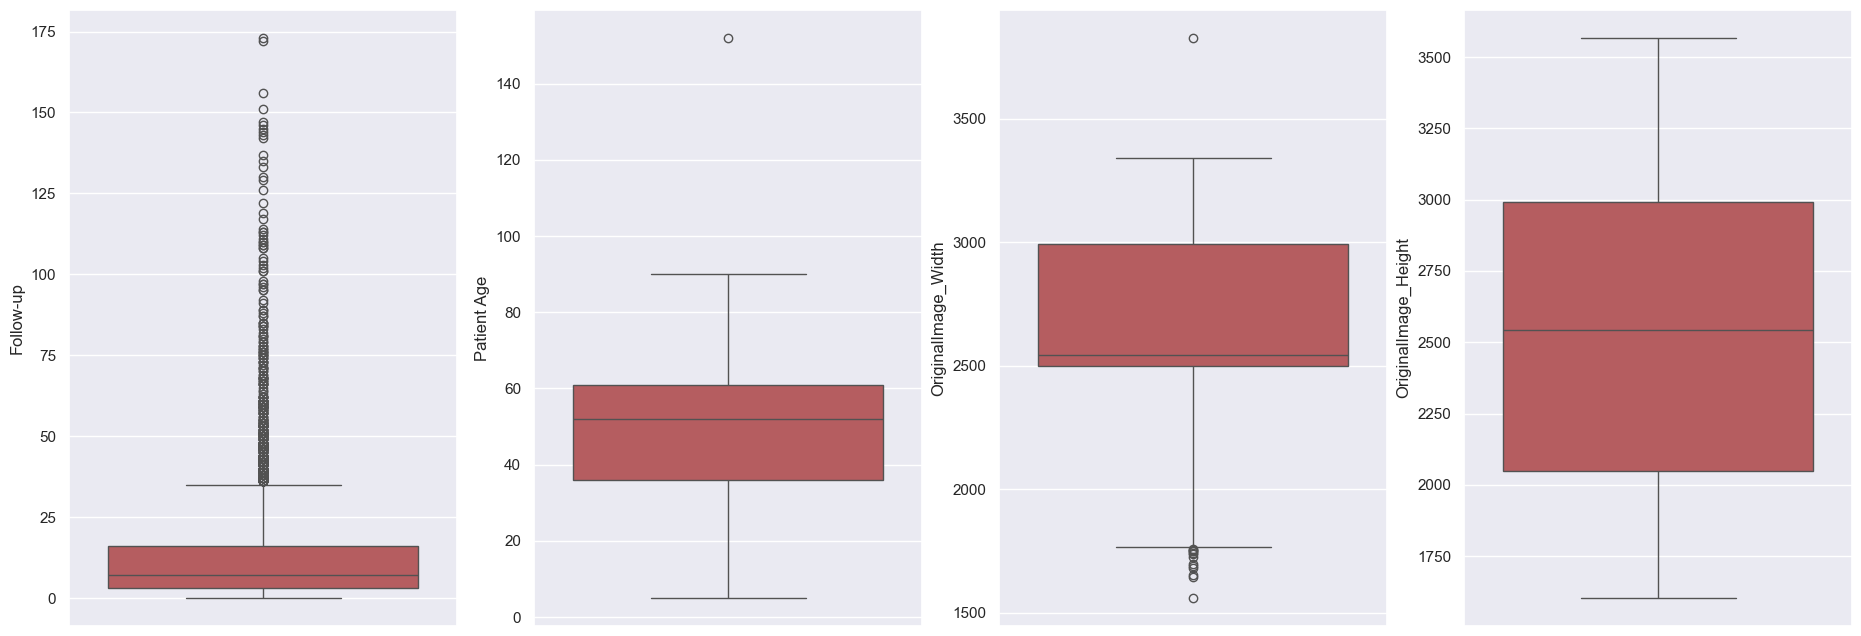

In [133]:
#Boxplot to check the distribution of the feature and detect outlier
columns_to_plot = ['Follow-up','Patient Age','OriginalImage_Width','OriginalImage_Height']
plt.figure(figsize=(20,8))
fig, axes = plt.subplots(ncols=len(columns_to_plot))
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(y=df[column], ax=axis, color="r") 
sns.set(rc={'figure.figsize':(23,8)})
plt.show()

In [134]:
# Computing 10th, 90th percentiles and replacing the outlier treatment in python
tenth_percentile = np.percentile(df['Follow-up'], 10) 
ninetieth_percentile = np.percentile(df['Follow-up'], 90) 
# print(tenth_percentile, ninetieth_percentile)b = 
b= np.where(df['Follow-up']<tenth_percentile, tenth_percentile, df['Follow-up']) 
b = np.where(df['Follow-up']>ninetieth_percentile, ninetieth_percentile, df['Follow-up']) 
# print("Sample:", sample) 
df['Follow-up'] = b

In [135]:
# Computing 10th, 90th percentiles and replacing the outlier treatment in python
tenth_percentile = np.percentile(df['OriginalImage_Width'], 10) 
ninetieth_percentile = np.percentile(df['OriginalImage_Width'], 90) 
# print(tenth_percentile, ninetieth_percentile)b = 
d = np.where(df['OriginalImage_Width']<tenth_percentile, tenth_percentile, df['OriginalImage_Width']) 
d = np.where(df['OriginalImage_Width']>ninetieth_percentile, ninetieth_percentile, df['OriginalImage_Width']) 
# print("Sample:", sample) 
df['OriginalImage_Width'] = d

In [136]:
# Preprocessing test data
test = pd.read_csv("E:/Data Science/Hackathon/test_set.csv")
t = test.drop(['Image Index','Patient ID','OriginalImagePixelSpacing_x','OriginalImagePixelSpacing_y'],axis=1)

In [137]:
df.head()

,Finding Labels,Follow-up,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height
0,0,0.0,75,M,PA,2638.0,2449
1,1,11.0,60,M,AP,3056.0,2544
2,1,12.0,60,M,AP,3056.0,2544
3,1,13.0,60,M,AP,3056.0,2544
4,1,32.0,56,M,PA,2952.0,2968


In [138]:
t.head()

,Follow-up,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height
0,20,62,M,PA,2021,2021
1,21,62,M,PA,2021,2021
2,33,56,M,PA,2946,2991
3,0,71,M,PA,2048,2500
4,2,77,M,PA,2992,2991


# Model Building

In [139]:
#Label encoding
d = {'M':0,'F':1,'PA':0,'AP':1}
df= df.replace(d)
t = t.replace(d)

In [140]:
x = df.drop('Finding Labels',axis=1)
y = df['Finding Labels']

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=1)

In [143]:
#Scaling
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
t = sc.transform(t.values)

C:\Anaconda\envs\new\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78      2189
           1       0.61      0.22      0.32      1255

    accuracy                           0.66      3444
   macro avg       0.64      0.57      0.55      3444
weighted avg       0.65      0.66      0.61      3444



In [32]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80       580
           1       0.56      0.20      0.29       281

    accuracy                           0.69       861
   macro avg       0.63      0.56      0.55       861
weighted avg       0.66      0.69      0.63       861



# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
y_train_pred = kn.predict(x_train)
y_test_pred = kn.predict(x_test)

In [36]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2189
           1       0.68      0.58      0.63      1255

    accuracy                           0.75      3444
   macro avg       0.73      0.71      0.72      3444
weighted avg       0.74      0.75      0.74      3444



In [37]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       580
           1       0.50      0.47      0.49       281

    accuracy                           0.68       861
   macro avg       0.63      0.62      0.63       861
weighted avg       0.67      0.68      0.67       861



In [38]:
pred = kn.predict(t)

In [39]:
dic = {'Image Index':test['Image Index'],'Finding Labels':pred}
sub = pd.DataFrame(dic)

In [40]:
sub.to_csv('Sample submission.csv',index=False)

In [46]:
def sub(model,test,scled_data):
    pred = model.predict(scled_data)
    dic = {'Image Index':test['Image Index'],'Finding Labels':pred}
    sub = pd.DataFrame(dic)
    return sub.to_csv('Sample submission.csv',index=False)

# SVM

In [41]:
from sklearn.svm import SVC

In [42]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [43]:
y_train_pred = sv.predict(x_train)
y_test_pred = sv.predict(x_test)

In [44]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      2189
           1       0.61      0.33      0.43      1255

    accuracy                           0.68      3444
   macro avg       0.65      0.60      0.60      3444
weighted avg       0.66      0.68      0.65      3444



In [45]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       580
           1       0.51      0.32      0.39       281

    accuracy                           0.68       861
   macro avg       0.62      0.59      0.59       861
weighted avg       0.65      0.68      0.65       861



In [49]:
sub(sv,test,t)

# Decision tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [54]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2189
           1       0.99      0.91      0.95      1255

    accuracy                           0.96      3444
   macro avg       0.97      0.95      0.96      3444
weighted avg       0.96      0.96      0.96      3444



In [55]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       580
           1       0.50      0.52      0.51       281

    accuracy                           0.67       861
   macro avg       0.63      0.63      0.63       861
weighted avg       0.68      0.67      0.67       861



In [56]:
sub(dt,test,t)

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [71]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [73]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2189
           1       0.96      0.94      0.95      1255

    accuracy                           0.96      3444
   macro avg       0.96      0.96      0.96      3444
weighted avg       0.96      0.96      0.96      3444



In [74]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       580
           1       0.51      0.52      0.51       281

    accuracy                           0.68       861
   macro avg       0.64      0.64      0.64       861
weighted avg       0.68      0.68      0.68       861



In [75]:
sub(rf,test,t)

# Gradient boost

In [81]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [82]:
y_train_pred = gb.predict(x_train)
y_test_pred = gb.predict(x_test)

In [83]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80      2189
           1       0.71      0.37      0.49      1255

    accuracy                           0.72      3444
   macro avg       0.72      0.64      0.65      3444
weighted avg       0.72      0.72      0.69      3444



In [84]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       580
           1       0.57      0.36      0.44       281

    accuracy                           0.70       861
   macro avg       0.65      0.61      0.62       861
weighted avg       0.68      0.70      0.68       861



In [85]:
sub(gb,test,t)

# Ada Boost

In [86]:
ad =AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [87]:
y_train_pred = ad.predict(x_train)
y_test_pred = ad.predict(x_test)

In [88]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      2189
           1       0.62      0.31      0.42      1255

    accuracy                           0.68      3444
   macro avg       0.66      0.60      0.60      3444
weighted avg       0.67      0.68      0.65      3444



In [89]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       580
           1       0.58      0.31      0.40       281

    accuracy                           0.70       861
   macro avg       0.65      0.60      0.60       861
weighted avg       0.68      0.70      0.67       861



In [91]:
sub(ad,test,t)

# NEural Network

In [92]:
import tensorflow as tf

In [ ]:
tf.keras.initializers.

In [171]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(14,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [172]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [173]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
108/108 [==============================] - 2s 5ms/step - loss: 0.7328 - accuracy: 0.5677 - val_loss: 0.6580 - val_accuracy: 0.6725
Epoch 2/100
108/108 [==============================] - 1s 5ms/step - loss: 0.6747 - accuracy: 0.6118 - val_loss: 0.6530 - val_accuracy: 0.6748
Epoch 3/100
108/108 [==============================] - 1s 5ms/step - loss: 0.6609 - accuracy: 0.6275 - val_loss: 0.6356 - val_accuracy: 0.6736
Epoch 4/100
108/108 [==============================] - 1s 5ms/step - loss: 0.6540 - accuracy: 0.6402 - val_loss: 0.6308 - val_accuracy: 0.6736
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6339 - val_loss: 0.6275 - val_accuracy: 0.6794
Epoch 6/100
108/108 [==============================] - 1s 5ms/step - loss: 0.6497 - accuracy: 0.6339 - val_loss: 0.6215 - val_accuracy: 0.6736
Epoch 7/100
108/108 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.6484 - val_loss: 0.6154 - val_accuracy: 0.6806

Text(0.5, 1.0, 'Accuracy vs Val_Accuracy')

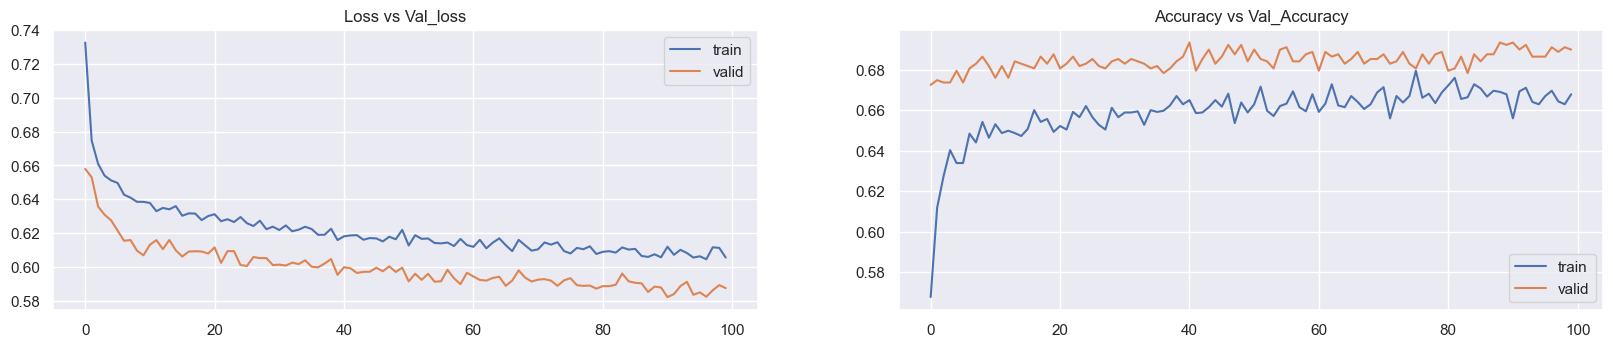

In [174]:
hist1 = pd.DataFrame(history.history)
hist1['epoch'] = history.epoch

# Plotting accuracy and loss at different epochs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Loss vs Val_loss")
plt.subplot(2,2,2)
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Accuracy vs Val_Accuracy")

In [175]:
pred = model.predict(t) > 0.5
pred = pred.astype(np.int)
pred = pred.flatten()
dic = {'Image Index':test['Image Index'],'Finding Labels':pred}
sub = pd.DataFrame(dic)
sub.to_csv('Sample submission.csv',index=False)

58/58 [==============================] - 0s 2ms/step


C:\Users\Mrinal Kalita\AppData\Local\Temp\ipykernel_7136\1933411178.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred = pred.astype(np.int)
